In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import keras
import cv2
import numpy as np
from keras.models import load_model, Model
import glob

2022-03-31 18:58:42.291069: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-31 18:58:42.291125: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
folders = [
    'ARCH',
    'RL',
    'UL',
    'WCDI',
    'WE',
    'WPL',
    'WST'
]
feature_img = []
image_path = []
image_label = []
for folder in folders:
    for img in glob.glob("/data_science/data_science/data/v1/image_fingerprint/datanew/val/{}/*.bmp".format(folder)):
        image_path.append(img)
        image_label.append(folder)

In [3]:
data=[]
for file in image_path:
    img=cv2.imread(file)
    img=cv2.resize(img,(299,299),interpolation=cv2.INTER_NEAREST)
    img=img.astype('float32')
    data.append(img)
data = np.array(data)
data = data/255.0
reshaped_data = data.reshape(len(data),-1)

In [4]:
reshaped_data.shape

(3896, 268203)

In [5]:
# svd = TruncatedSVD(n_components=268203-1,random_state=42).fit(reshaped_data)
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5000,random_state=42).fit(reshaped_data)
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

NameError: name 'plt' is not defined

Text(0, 0.5, 'cumulative explained variance')

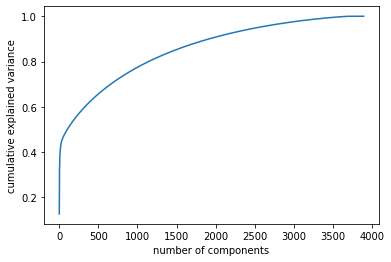

In [6]:
import numpy as np
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [7]:
X_svd = TruncatedSVD(n_components=3500,random_state=42).fit_transform(reshaped_data)

In [12]:
X_svd_1 = TruncatedSVD(n_components=1000,random_state=42).fit_transform(reshaped_data)

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0)
clusters_kmean = kmeans.fit_predict(X_svd_1)
kmeans.cluster_centers_.shape

(7, 1000)

In [21]:
clusters_kmean = clusters_kmean.astype(str)

In [18]:
import numpy as np
from sklearn.manifold import TSNE
X =reshaped_data
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random',verbose =1).fit_transform(X_svd)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3896 samples in 0.013s...
[t-SNE] Computed neighbors for 3896 samples in 0.865s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3896
[t-SNE] Computed conditional probabilities for sample 2000 / 3896
[t-SNE] Computed conditional probabilities for sample 3000 / 3896
[t-SNE] Computed conditional probabilities for sample 3896 / 3896
[t-SNE] Mean sigma: 28.064278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.449799
[t-SNE] KL divergence after 1000 iterations: 2.277113


In [19]:
from sklearn.manifold import TSNE
import plotly.express as px

fig = px.scatter(
    X_embedded, x=0, y=1,
    color=image_label,title="True Label"
)
fig.show()

In [22]:
from sklearn.manifold import TSNE
import plotly.express as px

fig = px.scatter(
    X_embedded, x=0, y=1,
    color=clusters_kmean,title="K-mean"
)
fig.show()

In [23]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(image_label, clusters_kmean)

0.001141280261083778